In [1]:
import os
import fnmatch
import pandas as pd
import csv
import numpy as np
from pathlib import Path
from openpyxl import load_workbook
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
#sns.set_theme(style="whitegrid")
import scipy.stats as stats

In [2]:
# Definitions

path = os.getcwd()
#path = os.path.dirname(analysis_path)

In [3]:
# white background 
sns.set(style="ticks", context="talk")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.4})
plt.style.use('default')

In [4]:
df = pd.read_excel(f'{path}/MHMZ Occupancy.xlsx', sheet_name='MHMZ_SBR', header = 0, engine = 'openpyxl')

df

,Rat_Number,Treatment,Cerebellum,Front Cort,SBR (Front Cort-Cerebellum)/Cerebellum
0,1,Veh,238.741736,602.902318,1.525333
1,2,Veh,178.739819,172.122715,-0.037021
2,3,Veh,87.029866,437.163162,4.023140
3,4,Veh,14.883516,84.122203,4.652038
4,5,Veh,9.661091,36.892765,2.818696
5,6,Veh,13.016497,48.526270,2.728059
6,7,Veh,5.927152,35.163095,4.932545
7,8,Veh,2.933925,12.001638,3.090642
8,9,Veh,5.415709,29.676829,4.479768
9,10,Veh,6.350893,37.338480,4.879249


/var/folders/lb/nxxqtlbj7yd1c5frnp5_vxk40000gn/T/ipykernel_36363/585998987.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Treatment', y='SBR (Front Cort-Cerebellum)/Cerebellum', data=df, order=['Veh', 'Har + DMT'],


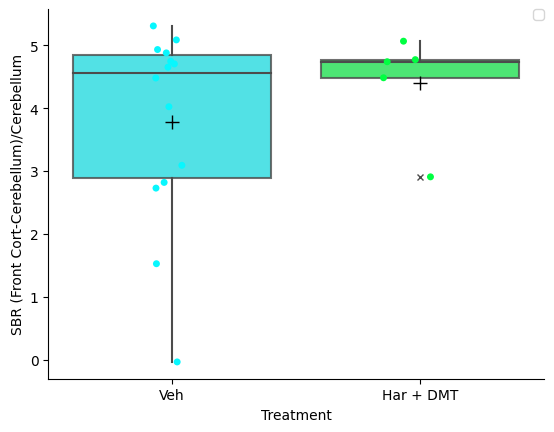

In [5]:
colors = [
   '#08F7FE',  # teal/cyan
   # '#FE53BB',  # pink
   # '#F5D300',  # yellow
    '#00ff41',] # matrix green

g = sns.boxplot(x='Treatment', y='SBR (Front Cort-Cerebellum)/Cerebellum', data=df, order=['Veh', 'Har + DMT'], 
                flierprops={"marker": "x"}, showmeans=True, showcaps=False, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}, palette=colors, width=.8, boxprops={'alpha': 0.8}) 

old_len_collections = len(g.collections)
sns.stripplot(x='Treatment', y='SBR (Front Cort-Cerebellum)/Cerebellum', data=df, order=['Veh', 'Har + DMT'], 
                ax=g, palette=colors)#dodge=True) 
            
for dots in g.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([-0.05, 0]))

sns.despine()

# Get the handles and labels. For this example it'll be 2 tuples of length 4 each.
handles, labels = g.get_legend_handles_labels()

# When creating the legend, only use the first two elements to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.0, 1.0), loc=1, borderaxespad=0.)
for handle in l.legendHandles:
    handle.set_alpha(0.7)
    
#rasterized needed for .eps to account for transparency (that comes with the confidence intervals of the regression line)
fig = g.get_figure()
fig.set_rasterized(True)
fig.savefig(f'{path}/plots/MHMZ_SBR_plot.eps', dpi=300, format='eps')
fig.savefig(f'{path}/plots/MHMZ_SBR_occupancy_plot.png')


## Two Samples TTest for MHMZ Occupancy



In [6]:
# homogeneity of variance testing

print(f'Levene')
print(stats.levene(df['SBR (Front Cort-Cerebellum)/Cerebellum'][(df['Treatment'] == 'Har + DMT')],
         df['SBR (Front Cort-Cerebellum)/Cerebellum'][(df['Treatment'] == 'Veh')]))

Levene
LeveneResult(statistic=0.987489997755856, pvalue=0.3342914390828012)


-> homogeneity of variance is okay

In [7]:
# normality test
print('Veh')
print(stats.shapiro(df['SBR (Front Cort-Cerebellum)/Cerebellum'][df['Treatment']=='Veh']))
print('Har + DMT')
print(stats.shapiro(df['SBR (Front Cort-Cerebellum)/Cerebellum'][df['Treatment']=='Har + DMT']))

Veh
ShapiroResult(statistic=0.8366765975952148, pvalue=0.01471669226884842)
Har + DMT
ShapiroResult(statistic=0.7719012498855591, pvalue=0.046886131167411804)


### Q-Q-Plots

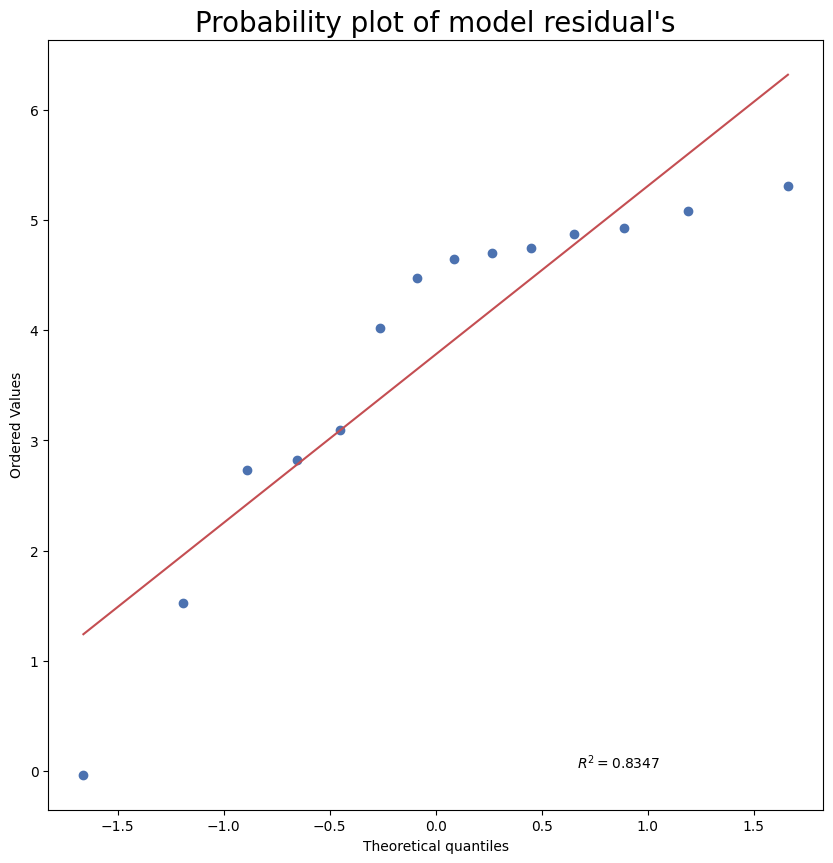

In [9]:
## Vehicle

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(df['SBR (Front Cort-Cerebellum)/Cerebellum'][df['Treatment']=='Veh'], plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

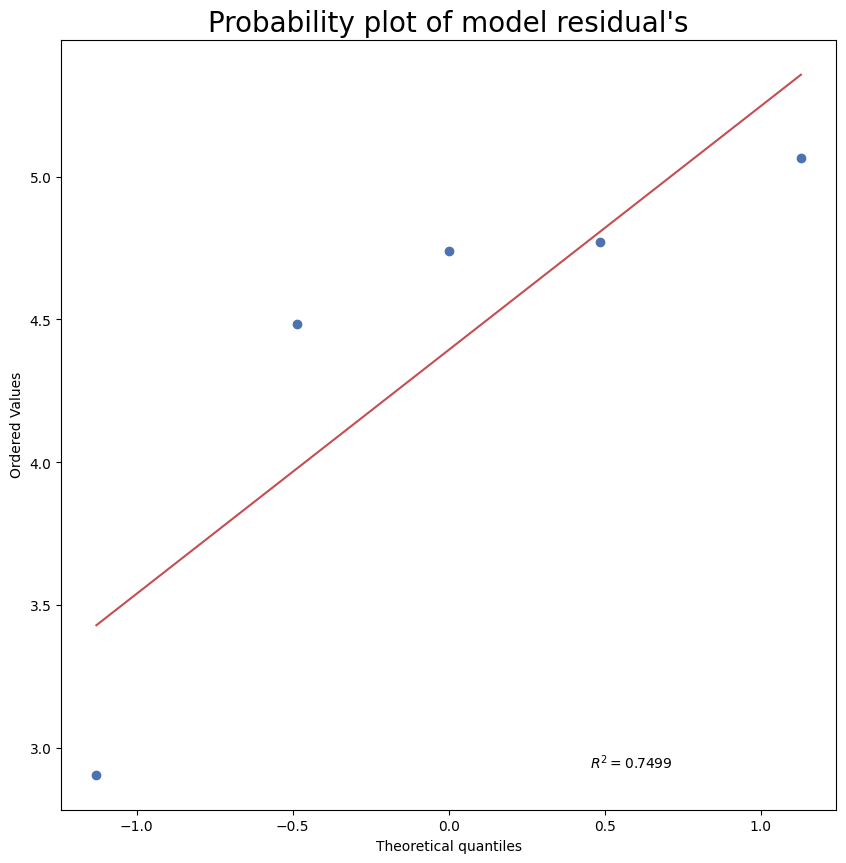

In [10]:
## Har + DMT

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(df['SBR (Front Cort-Cerebellum)/Cerebellum'][df['Treatment']=='Har + DMT'], plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

-> data is not normally distributed, use Mann-Whitney U test instead of ttest

### Mann-Whitney U test

In [19]:
stats.mannwhitneyu(df['SBR (Front Cort-Cerebellum)/Cerebellum'][df['Treatment']=='Veh'], df['SBR (Front Cort-Cerebellum)/Cerebellum'][df['Treatment']=='Har + DMT'],
                   alternative='two-sided')

MannwhitneyuResult(statistic=28.0, pvalue=0.5593395252837977)

In [18]:
sbr_har_dmt = np.round(df['SBR (Front Cort-Cerebellum)/Cerebellum'][df['Treatment']=='Har + DMT'].mean(), decimals = 2)
sbr_har_dmt_sd = np.round(df['SBR (Front Cort-Cerebellum)/Cerebellum'][df['Treatment']=='Har + DMT'].std(), decimals = 2)

sbr_veh = np.round(df['SBR (Front Cort-Cerebellum)/Cerebellum'][df['Treatment']=='Veh'].mean(), decimals = 2)
sbr_veh_sd = np.round(df['SBR (Front Cort-Cerebellum)/Cerebellum'][df['Treatment']=='Veh'].std(), decimals = 2)


sbr_total = np.round(df['SBR (Front Cort-Cerebellum)/Cerebellum'].mean(), decimals = 2)
sbr_total_sd = np.round(df['SBR (Front Cort-Cerebellum)/Cerebellum'].std(), decimals = 2)


In [19]:
print('Har + DMT ' + str(sbr_har_dmt) + ' ' + str(sbr_har_dmt_sd))
print('Veh ' + str(sbr_veh) + ' ' + str(sbr_veh_sd))
print('Total ' + str(sbr_total) + ' ' + str(sbr_total_sd))

Har + DMT 4.39 0.86
Veh 3.78 1.56
Total 3.49 1.8
